# Exercise 2. Crime Dataset (Regression)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [224]:
%cd "D:\Exercise"

D:\Exercise


In [445]:
crim = pd.read_csv('crime_prep.csv')

# Exploratory Data Analysis.

In [363]:
crim.head(2)

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN


In [446]:
crim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, target to v_cont_126
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB


In [365]:
crim.describe()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
count,1994.000000,1994.000000,820.000000,817.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,319.000000,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000
mean,0.237979,28.683551,58.826829,46188.336597,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,...,0.305987,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078
std,0.232985,16.397553,126.420560,25299.726569,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,...,0.226884,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718
min,0.000000,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,12.000000,9.000000,25065.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,...,0.140000,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000
50%,0.150000,34.000000,23.000000,48090.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,...,0.260000,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000
75%,0.330000,42.000000,59.500000,66660.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,...,0.395000,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000
max,1.000000,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [366]:
crim['v_cat_3'].value_counts()  # we have 10 different classes here

4     200
3     200
2     200
1     200
10    199
9     199
8     199
7     199
6     199
5     199
Name: v_cat_3, dtype: int64

 # Missing Data.
We can use seaborn to create a simple heatmap to see where we are missing data!

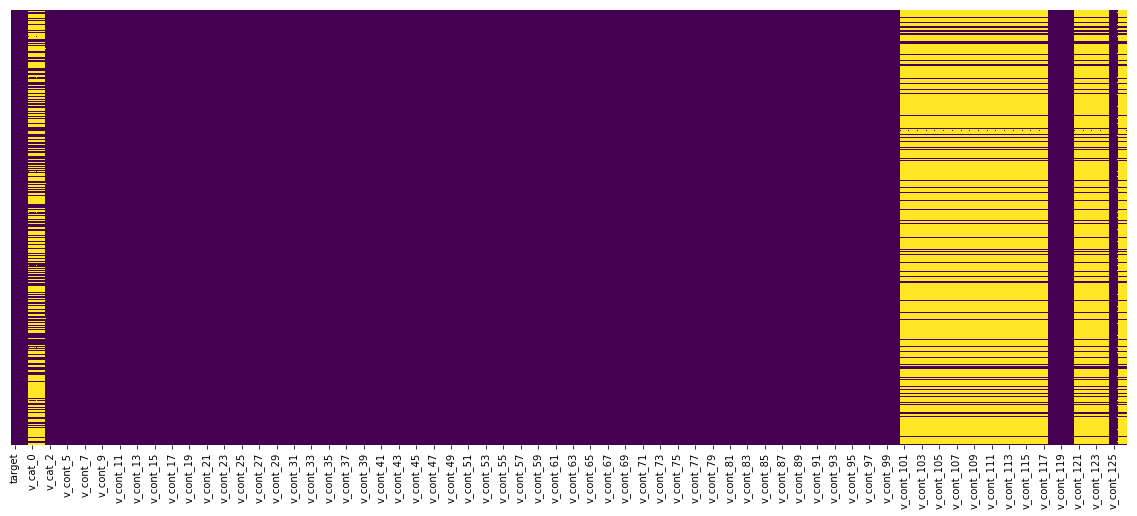

In [367]:
plt.figure(figsize=(20,8))
sns.heatmap(crim.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are lots of missing data for v_cat_0,v_cat_1 and v_cont_101,v_cont_102,,...,v_cont_126,(v_cont_118,v_cont_119,v_cont_120,v_cont_125 are good) columns.It's better to drop them.Especially for the end of the data.Because the number of missing values is high.

In [447]:
crim.drop(['v_cat_0','v_cat_1','v_cont_101','v_cont_102','v_cont_103','v_cont_104','v_cont_105','v_cont_106','v_cont_107','v_cont_108','v_cont_109','v_cont_110','v_cont_111','v_cont_112','v_cont_113','v_cont_114','v_cont_115','v_cont_116','v_cont_117','v_cont_121','v_cont_122','v_cont_123','v_cont_124','v_cont_126'  ],axis=1,inplace=True)

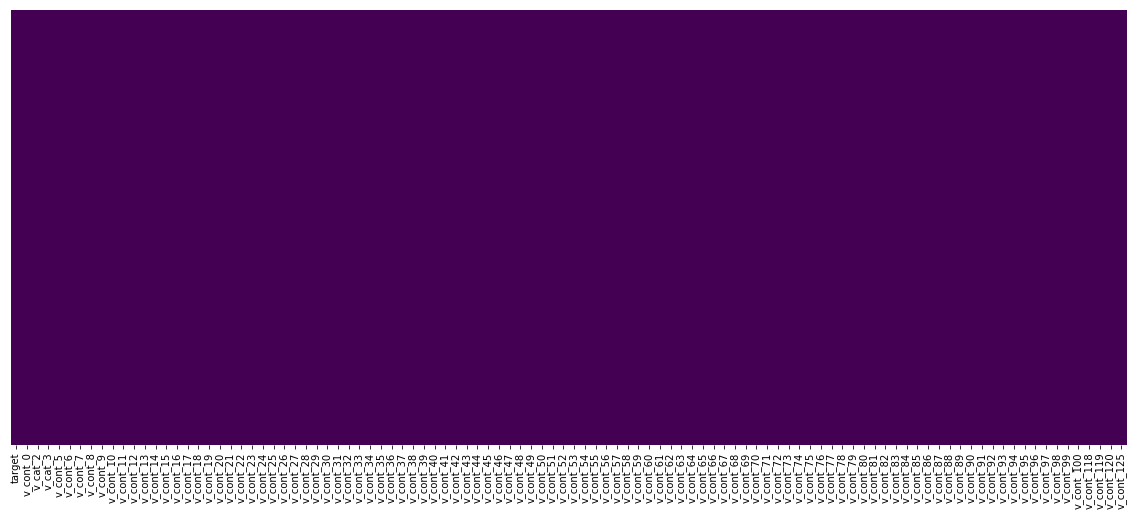

In [448]:
# we check one more time data set for missing data:

plt.figure(figsize=(20,8))
sns.heatmap(crim.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [452]:
crim.dropna(inplace=True)
y = crim['target']
crim.drop('target',axis =1,inplace=True)
X = crim

In [456]:
y.shape

(1993,)

We are good to start modeling without any missing data.But befor that we need to do some preprocessing data

We have two cathegorical variable(v_cat_2,v_cat_3) which need to be encoding.


In [457]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_cat2 = LabelEncoder()
X.iloc[:, 1] = labelencoder_cat2.fit_transform(X.iloc[:, 1])
labelencoder_cat3 = LabelEncoder()
X.iloc[:, 2] = labelencoder_cat3.fit_transform(X.iloc[:,2])

# we need to generate Dummy variable for these two variables

onehotencoder = OneHotEncoder(categorical_features = [1])
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()


# Train Test Split

In [458]:

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [417]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [418]:
#Predicting the Test set results

y_pred = regressor.predict(X_test)

In [419]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train,y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.653737891539
/n
0.0496484879


# Bachward elimination and feature selection on the dataset


In [393]:
# Building optimal model using the bachward elimination

import statsmodels.formula.api as sm

In [394]:
# Iterate 1

# adding column one for b0, the first coefficient of regression equation.
X= np.append(arr = np.ones((1993,1)).astype(int),values =X , axis = 1)
X_opt = X[:,:]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     39.26
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:47:02   Log-Likelihood:                 1270.2
No. Observations:                1993   AIC:                            -2316.
Df Residuals:                    1881   BIC:                            -1690.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5132      0.184      2.782      0.005       0.151       0.875
x1             0.0698      0.021      3.391      0.001       0.029       0.110
x2             0.0484      0.021      2.342      0.019       0.008       0.089
x3             0.0551      0.021      2.654      0.008       0.014       0.096
x4             0.0411      0.021      1.981      0.048       0.000       0.082
x5             0.0563      0.020      2.759      0.006       0.016       0.096
x6             0.0590      0.021      2.868      0.004       0.019       0.099
x7             0.0449      0.021      2.180      0.029       0.004       0.085
x8             0.0473      0.021      2.305      0.021       0.007       0.088
x9             0.0524      0.020      2.568      0.010       0.012       0.092
x10            0.0389      0.020      1.901      0.057      -0.001       0.079
x11           -0.0007      0.000     -2.818      0.005      -0.001      -0.000
x12         -3.39e-06   5.81e-06     -0.584      0.560   -1.48e-05       8e-06
x13            0.1635      0.399      0.409      0.682      -0.620       0.947
x14           -0.0083      0.087     -0.096      0.924      -0.178       0.162
x15            0.2026      0.051      3.961      0.000       0.102       0.303
x16           -0.0512      0.059     -0.871      0.384      -0.166       0.064
x17           -0.0131      0.034     -0.382      0.703      -0.080       0.054
x18            0.0553      0.053      1.035      0.301      -0.049       0.160
x19            0.1230      0.106      1.160      0.246      -0.085       0.331
x20           -0.2271      0.157     -1.449      0.147      -0.534       0.080
x21           -0.1401      0.164     -0.852      0.394      -0.463       0.182
x22            0.0414      0.104      0.399      0.690      -0.162       0.245
x23           -0.2725      0.389     -0.701      0.483      -1.035       0.490
x24            0.0481      0.016      3.072      0.002       0.017       0.079
x25           -0.1725      0.173     -1.000      0.318      -0.511       0.166
x26           -0.1919      0.090     -2.139      0.033      -0.368      -0.016
x27            0.0493      0.020      2.449      0.014       0.010       0.089
x28           -0.1569      0.068     -2.313      0.021      -0.290      -0.024
x29            0.0898      0.107      0.836      0.403      -0.121       0.300
x30           -0.0059      0.046     -0.127      0.899      -0.096       0.085
x31           -0.0895      0.037     -2.426      0.015      -0.162      -0.017
x32            0.2709      0.160      1.690      0.091      -0.043       0.585
x33            0.0930      0.189      0.493      0.622      -0.277       0.463
x34           -0.3393      0.152     -2.227      0.026      -0.638      -0.040
x35           -0.0319      0.025     -1.252      0.211      -0.082       0.018
x3

In [344]:
X_opt.shape

(1993, 113)

# P-Value

As we can see in this summary we have p-value for all of our variables .So we know that the variables that have p-value more close to zero,they have more positive correlation with Target value.For example the variables : x15 , x103 , x95 ,x79 , x52 , x46 , x41 ,  x24 , x6 x5 , x1 are  highly correlated with the target. So we try to eliminate the variables that have maximum p-value at each iteration of backward elimination process by looking at the significance level that we selected already (for example SL= 0.05).we can eliminate a set of this variable at each iteration as well.At each step by eliminating the variables we should have better Adj R-squared value.Once Adj R- square decrease or all of p-values are less than SL, we will stop the process.

In [397]:
#iterate 2

# Backward elimination by looking at P-values and R-squared and Adjusted R-squared

X_opt = pd.DataFrame(X_opt)

X_opt = X_opt.drop([14,45,56,59,69,75,96,106],axis = 1)

y= list(y)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     42.49
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:47:51   Log-Likelihood:                 1270.2
No. Observations:                1993   AIC:                            -2332.
Df Residuals:                    1889   BIC:                            -1750.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5162      0.182      2.831      0.005       0.159       0.874
1              0.0701      0.020      3.439      0.001       0.030       0.110
2              0.0485      0.020      2.376      0.018       0.008       0.089
3              0.0555      0.021      2.696      0.007       0.015       0.096
4              0.0414      0.021      2.018      0.044       0.001       0.082
5              0.0566      0.020      2.804      0.005       0.017       0.096
6              0.0594      0.020      2.914      0.004       0.019       0.099
7              0.0451      0.020      2.207      0.027       0.005       0.085
8              0.0476      0.020      2.345      0.019       0.008       0.087
9              0.0526      0.020      2.610      0.009       0.013       0.092
10             0.0393      0.020      1.938      0.053      -0.000       0.079
11            -0.0007      0.000     -2.866      0.004      -0.001      -0.000
12         -3.363e-06   5.79e-06     -0.581      0.561   -1.47e-05    7.99e-06
13             0.1595      0.397      0.401      0.688      -0.620       0.939
15             0.2023      0.050      4.016      0.000       0.103       0.301
16            -0.0500      0.058     -0.861      0.389      -0.164       0.064
17            -0.0141      0.034     -0.417      0.677      -0.080       0.052
18             0.0543      0.053      1.029      0.303      -0.049       0.158
19             0.1241      0.103      1.206      0.228      -0.078       0.326
20            -0.2276      0.155     -1.469      0.142      -0.531       0.076
21            -0.1428      0.162     -0.880      0.379      -0.461       0.176
22             0.0410      0.102      0.402      0.688      -0.159       0.241
23            -0.2679      0.387     -0.693      0.488      -1.026       0.490
24             0.0479      0.016      3.077      0.002       0.017       0.078
25            -0.1698      0.170     -0.996      0.319      -0.504       0.164
26            -0.1924      0.088     -2.177      0.030      -0.366      -0.019
27             0.0492      0.020      2.466      0.014       0.010       0.088
28            -0.1569      0.067     -2.344      0.019      -0.288      -0.026
29             0.0885      0.106      0.838      0.402      -0.119       0.296
30            -0.0048      0.044     -0.111      0.912      -0.091       0.081
31            -0.0889      0.036     -2.484      0.013      -0.159      -0.019
32             0.2673      0.158      1.690      0.091      -0.043       0.577
33             0.0935      0.185      0.505      0.614      -0.270       0.457
34            -0.3375      0.151     -2.243      0.025      -0.633      -0.042
35            -0.0311      0.025     -1.232      0.218      -0.081       0.018
36            -0.0340      0.019     -1.761      0.078      -0.072       0.004
37

In [405]:
#iterate 3


X_opt = X_opt.drop([110,109,108,105,94,90,78,73,53,43,30,22],axis = 1)

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     48.31
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:55:27   Log-Likelihood:                 1268.9
No. Observations:                1993   AIC:                            -2354.
Df Residuals:                    1901   BIC:                            -1839.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5313      0.151      3.514      0.000       0.235       0.828
1              0.0711      0.018      4.032      0.000       0.037       0.106
2              0.0503      0.018      2.848      0.004       0.016       0.085
3              0.0576      0.018      3.263      0.001       0.023       0.092
4              0.0427      0.018      2.402      0.016       0.008       0.077
5              0.0582      0.017      3.351      0.001       0.024       0.092
6              0.0609      0.018      3.429      0.001       0.026       0.096
7              0.0468      0.018      2.655      0.008       0.012       0.081
8              0.0493      0.018      2.802      0.005       0.015       0.084
9              0.0536      0.017      3.077      0.002       0.019       0.088
10             0.0409      0.018      2.322      0.020       0.006       0.075
11            -0.0007      0.000     -2.816      0.005      -0.001      -0.000
12         -3.545e-06   5.75e-06     -0.616      0.538   -1.48e-05    7.74e-06
13             0.1915      0.385      0.497      0.619      -0.564       0.947
15             0.2004      0.050      4.038      0.000       0.103       0.298
16            -0.0515      0.057     -0.903      0.367      -0.163       0.060
17            -0.0122      0.032     -0.383      0.702      -0.074       0.050
18             0.0666      0.042      1.593      0.111      -0.015       0.149
19             0.0982      0.099      0.992      0.321      -0.096       0.292
20            -0.2483      0.145     -1.718      0.086      -0.532       0.035
21            -0.1090      0.155     -0.702      0.483      -0.414       0.196
23            -0.2863      0.381     -0.751      0.452      -1.033       0.461
24             0.0472      0.015      3.109      0.002       0.017       0.077
25            -0.1705      0.168     -1.014      0.311      -0.500       0.159
26            -0.1885      0.081     -2.330      0.020      -0.347      -0.030
27             0.0495      0.020      2.538      0.011       0.011       0.088
28            -0.1685      0.064     -2.636      0.008      -0.294      -0.043
29             0.1222      0.081      1.508      0.132      -0.037       0.281
31            -0.0897      0.035     -2.560      0.011      -0.158      -0.021
32             0.2795      0.155      1.807      0.071      -0.024       0.583
33             0.0687      0.181      0.380      0.704      -0.286       0.424
34            -0.3157      0.142     -2.221      0.026      -0.595      -0.037
35            -0.0306      0.025     -1.218      0.223      -0.080       0.019
36            -0.0338      0.019     -1.758      0.079      -0.072       0.004
37             0.0190      0.019      1.016      0.310      -0.018       0.056
38             0.0454      0.019      2.442      0.015       0.009       0.082
39

As you can see we are getting better Adj R- squared at each step.We will continue to have all of p-values less than SL

In [409]:
#iterate 4


X_opt = X_opt.drop([12,13,17,21,33,44,48,58,66,68,91],axis = 1)

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     55.13
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:48:49   Log-Likelihood:                 1267.1
No. Observations:                1993   AIC:                            -2372.
Df Residuals:                    1912   BIC:                            -1919.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5347      0.142      3.754      0.000       0.255       0.814
1              0.0716      0.017      4.246      0.000       0.039       0.105
2              0.0511      0.017      3.041      0.002       0.018       0.084
3              0.0582      0.017      3.452      0.001       0.025       0.091
4              0.0429      0.017      2.512      0.012       0.009       0.076
5              0.0581      0.017      3.480      0.001       0.025       0.091
6              0.0609      0.017      3.575      0.000       0.028       0.094
7              0.0469      0.017      2.785      0.005       0.014       0.080
8              0.0499      0.017      2.973      0.003       0.017       0.083
9              0.0535      0.017      3.225      0.001       0.021       0.086
10             0.0416      0.017      2.472      0.014       0.009       0.075
11            -0.0007      0.000     -2.908      0.004      -0.001      -0.000
15             0.1993      0.046      4.343      0.000       0.109       0.289
16            -0.0395      0.049     -0.805      0.421      -0.136       0.057
18             0.0718      0.039      1.818      0.069      -0.006       0.149
19             0.0450      0.062      0.731      0.465      -0.076       0.166
20            -0.3268      0.098     -3.321      0.001      -0.520      -0.134
23            -0.1057      0.111     -0.949      0.343      -0.324       0.113
24             0.0414      0.010      4.162      0.000       0.022       0.061
25            -0.1724      0.165     -1.043      0.297      -0.497       0.152
26            -0.1915      0.080     -2.402      0.016      -0.348      -0.035
27             0.0478      0.019      2.466      0.014       0.010       0.086
28            -0.1688      0.062     -2.715      0.007      -0.291      -0.047
29             0.1061      0.078      1.368      0.171      -0.046       0.258
31            -0.0939      0.034     -2.734      0.006      -0.161      -0.027
32             0.3155      0.145      2.174      0.030       0.031       0.600
34            -0.2593      0.077     -3.356      0.001      -0.411      -0.108
35            -0.0300      0.025     -1.209      0.227      -0.079       0.019
36            -0.0337      0.019     -1.761      0.078      -0.071       0.004
37             0.0187      0.018      1.015      0.310      -0.017       0.055
38             0.0458      0.018      2.484      0.013       0.010       0.082
39             0.0323      0.024      1.325      0.185      -0.016       0.080
40             0.1056      0.133      0.797      0.426      -0.154       0.366
41            -0.1455      0.054     -2.700      0.007      -0.251      -0.040
42            -0.0666      0.038     -1.769      0.077      -0.141       0.007
46             0.2577      0.063      4.109      0.000       0.135       0.381
47

In [410]:
#iterate 5

X_opt = X_opt.drop([16,19,23,37,40,67,72],axis = 1)

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     60.46
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:51:26   Log-Likelihood:                 1265.1
No. Observations:                1993   AIC:                            -2382.
Df Residuals:                    1919   BIC:                            -1968.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5073      0.134      3.778      0.000       0.244       0.771
1              0.0690      0.016      4.259      0.000       0.037       0.101
2              0.0483      0.016      3.010      0.003       0.017       0.080
3              0.0549      0.016      3.386      0.001       0.023       0.087
4              0.0403      0.016      2.469      0.014       0.008       0.072
5              0.0560      0.016      3.506      0.000       0.025       0.087
6              0.0581      0.016      3.548      0.000       0.026       0.090
7              0.0444      0.016      2.754      0.006       0.013       0.076
8              0.0469      0.016      2.905      0.004       0.015       0.079
9              0.0509      0.016      3.207      0.001       0.020       0.082
10             0.0385      0.016      2.391      0.017       0.007       0.070
11            -0.0007      0.000     -2.910      0.004      -0.001      -0.000
15             0.2239      0.032      6.998      0.000       0.161       0.287
18             0.0830      0.038      2.187      0.029       0.009       0.157
20            -0.2927      0.075     -3.922      0.000      -0.439      -0.146
24             0.0364      0.009      3.944      0.000       0.018       0.055
25            -0.1864      0.165     -1.133      0.257      -0.509       0.136
26            -0.2048      0.078     -2.619      0.009      -0.358      -0.051
27             0.0481      0.019      2.492      0.013       0.010       0.086
28            -0.1609      0.061     -2.622      0.009      -0.281      -0.041
29             0.0947      0.077      1.238      0.216      -0.055       0.245
31            -0.0914      0.034     -2.714      0.007      -0.158      -0.025
32             0.3211      0.143      2.249      0.025       0.041       0.601
34            -0.2540      0.076     -3.354      0.001      -0.402      -0.105
35            -0.0288      0.025     -1.169      0.243      -0.077       0.020
36            -0.0338      0.019     -1.772      0.076      -0.071       0.004
38             0.0452      0.018      2.461      0.014       0.009       0.081
39             0.0365      0.024      1.510      0.131      -0.011       0.084
41            -0.1339      0.051     -2.606      0.009      -0.235      -0.033
42            -0.0712      0.037     -1.908      0.057      -0.144       0.002
46             0.2457      0.062      3.973      0.000       0.124       0.367
47            -0.0579      0.030     -1.942      0.052      -0.116       0.001
49             0.0817      0.052      1.571      0.116      -0.020       0.184
50             0.1325      0.055      2.396      0.017       0.024       0.241
51             0.3404      0.094      3.629      0.000       0.156       0.524
52             0.2100      0.058      3.594      0.000       0.095       0.325
54

In [411]:
#iterate 6

X_opt = X_opt.drop([107,99,89,65,60,35,25],axis = 1)

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     66.63
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:55:00   Log-Likelihood:                 1260.1
No. Observations:                1993   AIC:                            -2386.
Df Residuals:                    1926   BIC:                            -2011.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5215      0.131      3.991      0.000       0.265       0.778
1              0.0699      0.016      4.385      0.000       0.039       0.101
2              0.0499      0.016      3.169      0.002       0.019       0.081
3              0.0561      0.016      3.528      0.000       0.025       0.087
4              0.0422      0.016      2.648      0.008       0.011       0.073
5              0.0559      0.016      3.576      0.000       0.025       0.087
6              0.0594      0.016      3.703      0.000       0.028       0.091
7              0.0467      0.016      2.936      0.003       0.016       0.078
8              0.0491      0.016      3.093      0.002       0.018       0.080
9              0.0524      0.016      3.378      0.001       0.022       0.083
10             0.0398      0.016      2.520      0.012       0.009       0.071
11            -0.0007      0.000     -3.075      0.002      -0.001      -0.000
15             0.2155      0.031      6.886      0.000       0.154       0.277
18             0.0789      0.038      2.083      0.037       0.005       0.153
20            -0.3067      0.070     -4.355      0.000      -0.445      -0.169
24             0.0387      0.009      4.231      0.000       0.021       0.057
26            -0.2190      0.078     -2.815      0.005      -0.371      -0.066
27             0.0446      0.019      2.325      0.020       0.007       0.082
28            -0.1691      0.061     -2.790      0.005      -0.288      -0.050
29             0.1188      0.075      1.593      0.111      -0.027       0.265
31            -0.0959      0.033     -2.867      0.004      -0.162      -0.030
32             0.1796      0.093      1.928      0.054      -0.003       0.362
34            -0.2648      0.074     -3.572      0.000      -0.410      -0.119
36            -0.0364      0.019     -1.909      0.056      -0.074       0.001
38             0.0436      0.018      2.378      0.017       0.008       0.079
39             0.0356      0.024      1.482      0.139      -0.012       0.083
41            -0.1009      0.048     -2.108      0.035      -0.195      -0.007
42            -0.0789      0.037     -2.149      0.032      -0.151      -0.007
46             0.2363      0.061      3.886      0.000       0.117       0.356
47            -0.0641      0.029     -2.179      0.029      -0.122      -0.006
49             0.0995      0.051      1.947      0.052      -0.001       0.200
50             0.1214      0.055      2.218      0.027       0.014       0.229
51             0.3015      0.092      3.275      0.001       0.121       0.482
52             0.2325      0.057      4.093      0.000       0.121       0.344
54            -0.2659      0.102     -2.604      0.009      -0.466      -0.066
55            -0.0971      0.119     -0.813      0.416      -0.331       0.137
57

In [412]:
#iterate 7

X_opt = X_opt.drop([29,39,55,62,70,71,82,83,97,104,112],axis = 1)

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     78.82
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:57:55   Log-Likelihood:                 1246.3
No. Observations:                1993   AIC:                            -2381.
Df Residuals:                    1937   BIC:                            -2067.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.7420      0.094      7.876      0.000       0.557       0.927
1              0.0943      0.013      7.349      0.000       0.069       0.119
2              0.0737      0.013      5.826      0.000       0.049       0.099
3              0.0770      0.013      5.913      0.000       0.051       0.103
4              0.0645      0.013      4.940      0.000       0.039       0.090
5              0.0786      0.013      6.074      0.000       0.053       0.104
6              0.0801      0.013      5.969      0.000       0.054       0.106
7              0.0683      0.013      5.160      0.000       0.042       0.094
8              0.0712      0.013      5.486      0.000       0.046       0.097
9              0.0742      0.013      5.761      0.000       0.049       0.100
10             0.0599      0.013      4.665      0.000       0.035       0.085
11            -0.0008      0.000     -3.531      0.000      -0.001      -0.000
15             0.2259      0.031      7.396      0.000       0.166       0.286
18             0.0492      0.036      1.351      0.177      -0.022       0.121
20            -0.3029      0.069     -4.377      0.000      -0.439      -0.167
24             0.0443      0.009      4.951      0.000       0.027       0.062
26            -0.2693      0.061     -4.428      0.000      -0.389      -0.150
27             0.0390      0.019      2.040      0.042       0.002       0.076
28            -0.1681      0.060     -2.792      0.005      -0.286      -0.050
31            -0.0983      0.032     -3.072      0.002      -0.161      -0.036
32             0.1552      0.092      1.685      0.092      -0.025       0.336
34            -0.2387      0.073     -3.268      0.001      -0.382      -0.095
36            -0.0381      0.019     -1.999      0.046      -0.076      -0.001
38             0.0554      0.017      3.173      0.002       0.021       0.090
41            -0.1441      0.046     -3.149      0.002      -0.234      -0.054
42            -0.0736      0.034     -2.143      0.032      -0.141      -0.006
46             0.1782      0.058      3.093      0.002       0.065       0.291
47            -0.0596      0.029     -2.026      0.043      -0.117      -0.002
49             0.0988      0.051      1.937      0.053      -0.001       0.199
50             0.1015      0.053      1.897      0.058      -0.003       0.206
51             0.3100      0.092      3.384      0.001       0.130       0.490
52             0.2063      0.055      3.746      0.000       0.098       0.314
54            -0.3087      0.101     -3.053      0.002      -0.507      -0.110
57            -0.3487      0.074     -4.721      0.000      -0.494      -0.204
61            -0.1232      0.027     -4.531      0.000      -0.177      -0.070
63             0.1078      0.042      2.570      0.010       0.026       0.190
64

In the iteration number 7 we see our Adj R-squared is decreased. So the model from 6th itration would have better performance.

# Regression algorithms to predict the price of houses

Assumption:
I take 'v_cat_1' column as a price for houses and in this column there are some Null values which are replaced by the Median price.

In [504]:
# Preprocessing the data

crim = pd.read_csv('crime_prep.csv')
y = crim['v_cat_1'].fillna(value = crim['v_cat_1'].median())
crim.dropna(inplace=True,axis = 1)
X = crim


In [505]:
# Encoding categorical data
# Ther are two of them

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_cat2 = LabelEncoder()
X.iloc[:, 2] = labelencoder_cat2.fit_transform(X.iloc[:, 2])
labelencoder_cat3 = LabelEncoder()
X.iloc[:, 3] = labelencoder_cat3.fit_transform(X.iloc[:,3])



In [506]:
# we need to generate Dummy variable for these two variables

onehotencoder = OneHotEncoder(categorical_features = [2])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


In [507]:
#Train Test Split

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [508]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#  Linear Regression

In [509]:
# Fitting  Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [510]:
#Predicting the Test set results

y_pred = regressor.predict(X_test)


In [511]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train,y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.334555234141
/n
0.0691896722985


#  Polinomial Regression

In [513]:
# Fitting Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [521]:

# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [519]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lin_reg_2, X = X_train,y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.334555234141
/n
0.0691896722985


# Decition Tree Regression

In [482]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(random_state = 0)
Dtree.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [483]:
#Predicting the Test set results

y_pred = Dtree.predict(X_test)

In [484]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Dtree, X = X_train,y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.470341015963
/n
0.0954936406229


# Random Forest Regression

In [485]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 300, random_state = 0)
rfr.fit(X_train, y_train)

#Predicting the Test set results
y_pred = rfr.predict(X_test)

In [486]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfr, X = X_train,y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.767206865677
/n
0.0515616695011


# SVR - Supper Vector Regression

In [487]:
# Fitting SVR to the dataset

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)


#Predicting the Test set results
y_pred = svr.predict(X_test)

In [488]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svr, X = X_train,y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

-0.00800212577512
/n
0.00714910119759


# ANN Regression

In [489]:
import theano
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Initialising the ANN 

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 112))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 20, nb_epoch = 200)


# Predicting the Test set results
y_pred = regressor.predict(X_test)


The accuracy of ANN is too weak!!. I've executed this model in Spyder and by changing lots of hyper parametrs, such as activation functions ,number of neurons and number of layers I did not get any good result!

# Comparison of results:

Again the random forest has the best perfomance among of Linear Regression,Decistion tree,Polinomial Regression,SVM Regression and ANN.
But in these models we can still try to find as better as possible models by doing Grid search for every model.We just need to make a dictionary of hyper parameters that we want to try them, and as I explained in Exercise 1(in Support Vector Machines-SVM section)  we need just to use GridSearchCV class and passe the the dictionary as an input.We need to passe every regressor of the model as well.  

# Thank you !